In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [50]:
# carregar os dados do CSV
df = pd.read_csv("dados_3_meses.csv", sep=";")

In [51]:
# calcular a energia gerada (Wh) = irradiação * tempo (em horas) * área do painel * eficiência
tempo_horas = 0.25 # 15 minutos
area_painel = 2 # m2 - área média 

def eficiencia_energetica(status):
    if status == "Operando...":
        return 0.18
    elif status == "Falha":
        return 0.05
    else:
        return 0.0
    
energia_por_registro = df.apply(lambda x: round(x['irradiacao_solar'] * eficiencia_energetica(x['status_painel']) * tempo_horas * 1.6), axis=1) 

# Verificar o quanto de energia o painel gera por dia (Wh), com base na eficiência energética do painel solar
energia_gerada_dia = energia_por_registro.groupby(df['data']).sum()
print(energia_gerada_dia)

data
2025-02-01     767
2025-02-02    1716
2025-02-03    1914
2025-02-04    1692
2025-02-05    1581
              ... 
2025-04-26    1819
2025-04-27    2079
2025-04-28    1736
2025-04-29    1689
2025-04-30     872
Length: 89, dtype: int64


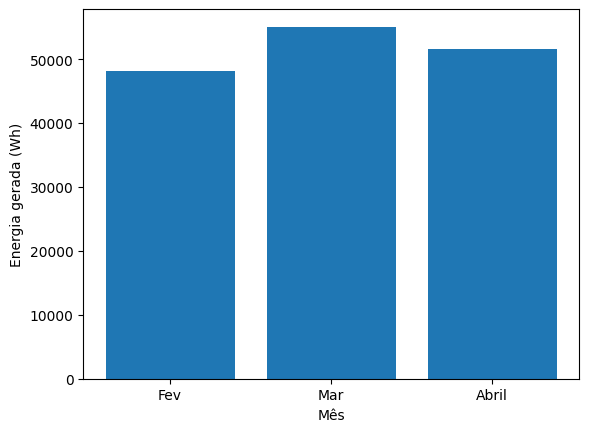

In [ ]:
# Mês mais produtivo (maior energia gerada)
df['data'] = pd.to_datetime(df['data'])

df_temp = pd.DataFrame({
    'mes': df['data'].dt.month,
    'energia': energia_por_registro
})
energia_por_mes = df_temp.groupby('mes')['energia'].sum()
x = energia_por_mes.index # index - meses
y= energia_por_mes.values # values - valores somados de energia para cada mês

df_temp.head(55)
plt.bar(x,y)
plt.xlabel("Mês")
plt.ylabel("Energia gerada (Wh)")
plt.xticks([2, 3, 4], ['Fev', 'Mar', 'Abril'])
plt.show()



In [ ]:
# Desempenho do painel durante o dia (quais horários o desempenho do painel é mais eficiente)

In [ ]:
# Em quais horários do dia há maior probabilidade de falhas

In [ ]:
# Relação entre índice de falhas e temperatura do painel

In [ ]:
# Faixa de temperatura ambiental em que o painel apresenta menos falhas